In [220]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(1)    # reproducible

torch.Size([100, 1])


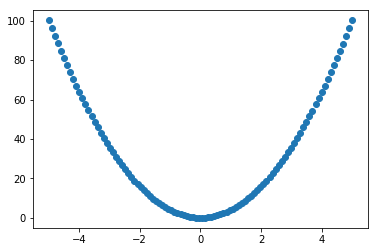

In [221]:
# Train data 
x = torch.unsqueeze(torch.linspace(-5,5,100),dim=1) # Let size = ([x,1])->output = 1
y = 4*x*x + 0.2*torch.rand(x.size())
print(x.size())                                     # Show size of x,see the output dim = 1

# Data graph
plt.scatter(x.numpy(),y.numpy())
plt.show()

In [222]:
# Define our neural network
class Net(nn.Module):
    def __init__(self,x,n1,y):
        super(Net, self).__init__()
        self.hidden = nn.Linear(x,n1)  # input = x,output = n1 hidden layer
        self.predict = nn.Linear(n1,y) # input = n1,output = y output layer
        
    def forward(self,x):
        x = F.relu(self.hidden(x))     # Activation function = relu
        x = self.predict(x)            # Layer ouptut 
        return x


In [223]:
# Build neural network
Network = Net(x=1,n1=30,y=1)           # Build Network,set layer number
print(Network)

Net(
  (hidden): Linear(in_features=1, out_features=30, bias=True)
  (predict): Linear(in_features=30, out_features=1, bias=True)
)


<bound method Module.parameters of Net(
  (hidden): Linear(in_features=1, out_features=30, bias=True)
  (predict): Linear(in_features=30, out_features=1, bias=True)
)>


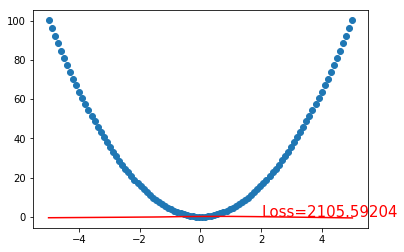

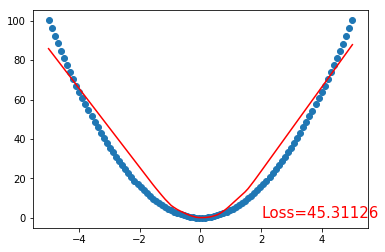

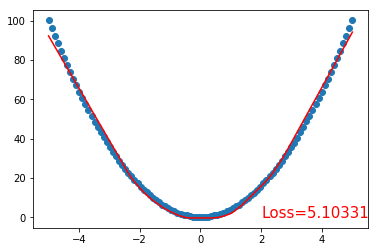

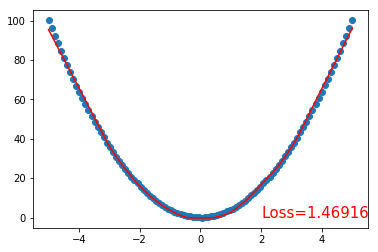

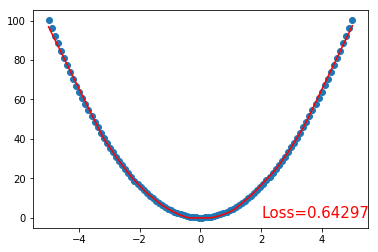

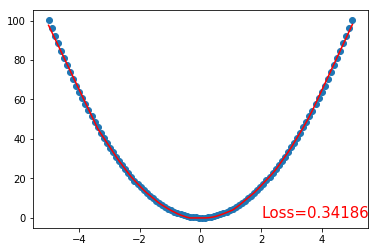

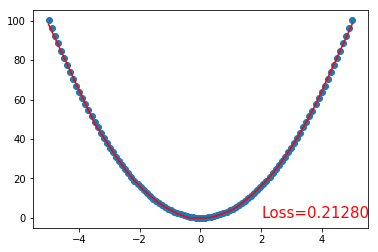

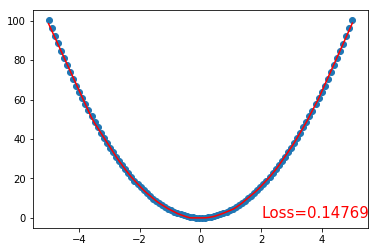

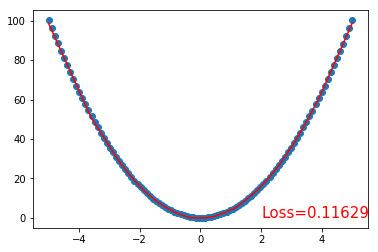

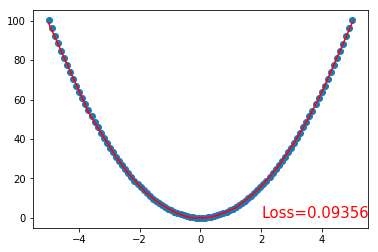

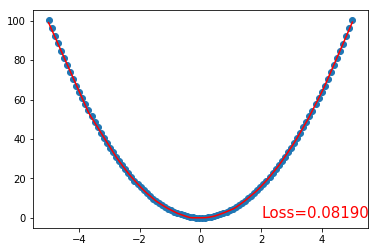

loss = 0.08190299


In [224]:
print(Network.parameters)
# optimizer = torch.optim.SGD(Network.parameters(),lr=0.02) # Use SGD
optimizer = torch.optim.Adam(Network.parameters(),lr=0.1)   # Use Adam
loss_func = nn.MSELoss()  # Define loss function = Mean squared loss           

TrainTime = 500           # epoch
for i in range(TrainTime):
    output = Network(x)
    
    loss = loss_func(output,y)
    optimizer.zero_grad() # Clear the gradient
    loss.backward()       # Backpropagation, compute gradients
    optimizer.step()      # Apply gradients
    
    if i%50 == 0:
        plt.scatter(x.numpy(),y.numpy())
        plt.plot(x.numpy(),output.data.numpy(),c='red')
        plt.text(2. , 0, 'Loss=%.5f' % loss.data.numpy(),fontdict={'size':15, 'color':'red'})
        plt.show()
        
plt.scatter(x.numpy(),y.numpy())
plt.plot(x.numpy(),output.data.numpy(),c='red')   
plt.text(2. , 0, 'Loss=%.5f' % loss.data.numpy(),fontdict={'size':15, 'color':'red'})
plt.show()
print('loss =',loss.data.numpy())